### Import

In [2]:
import os
import torch
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from torch.autograd import Variable

### Create Data

In [18]:
bias = 50.0
noise = 10.0
n_features = 10
x_train,y_train,coef = make_regression(n_samples = 1000,
                           n_features = n_features,
                           n_informative = n_features,
                           n_targets = 1,
                           bias = bias,
                           effective_rank = None,
                           noise = noise,
                           shuffle = True,
                           coef = True,
                           random_state = 42)
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

(1000, 10)
(1000, 1)


### Convert to torch Tensor

In [19]:
inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))

#inputs = Variable(torch.from_numpy(x_train).cuda())
#labels = Variable(torch.from_numpy(y_train).cuda())

### Create Linear Regresion Class Model

In [20]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

### Parameters

In [21]:
inputDim = n_features
outputDim = 1
learningRate = 0.01 
epochs = 1000

### Instantiate Model

In [22]:
model = linearRegression(inputDim, outputDim)

### Optimizer parameters

In [23]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Start Training

In [24]:
loss_history = []
for epoch in range(epochs):

    #Clear gradient buffers
    optimizer.zero_grad()

    #Get output from the model, given the inputs
    outputs = model(inputs)

    #Get loss for the predicted output
    loss = criterion(outputs, labels)
    loss_history.append(loss.item())

    #Get gradients w.r.t to parameters
    loss.backward()

    #Update parameters
    optimizer.step()

    #Print
    if (epoch % 100 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 20269.798828125
epoch 100, loss 493.309814453125
epoch 200, loss 102.27570343017578
epoch 300, loss 93.12458801269531
epoch 400, loss 92.8824691772461
epoch 500, loss 92.8755111694336
epoch 600, loss 92.87528228759766
epoch 700, loss 92.87528228759766
epoch 800, loss 92.87528228759766
epoch 900, loss 92.87528228759766


### Plot Loss

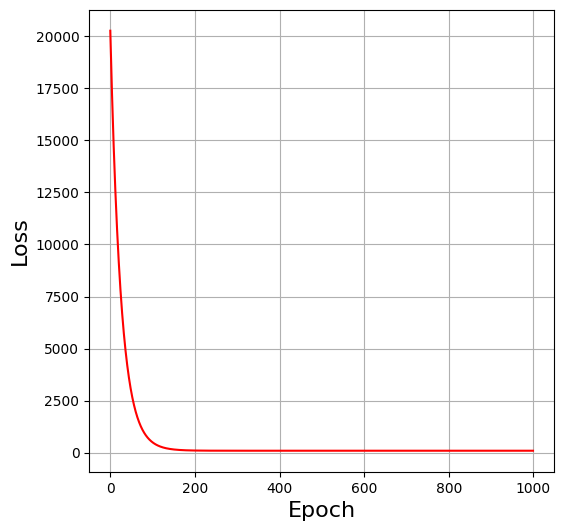

In [25]:
loss_history = np.array(loss_history)
plt.figure(figsize=(6,6))
plt.plot(loss_history,'r')
plt.grid();
plt.xlabel('Epoch',fontsize=16);
plt.ylabel('Loss',fontsize=16);

### Get Parameters and compare with actual coefficients

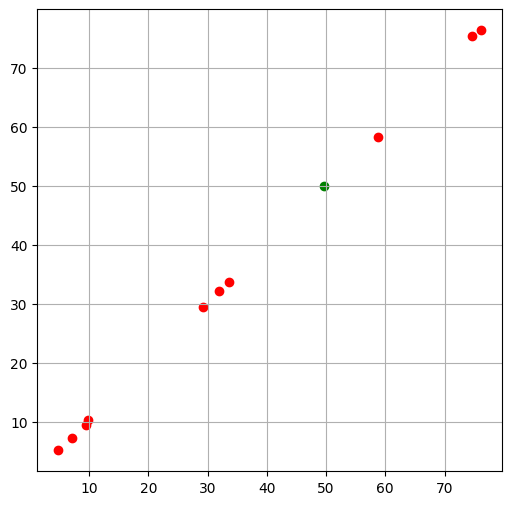

In [30]:
for name,param in model.named_parameters():
    if 'weight' in name:
        w = param[0].detach().numpy()
    if 'bias' in name:
        b = param[0].detach().numpy()        

plt.figure(figsize=(6,6))        
plt.scatter(w,coef,c='r')
plt.scatter(b,bias,c='g')
plt.grid()